In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of reviews')

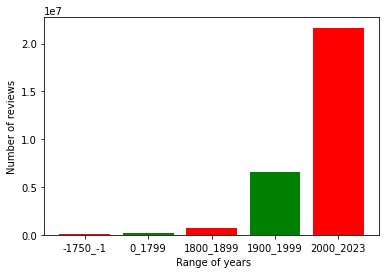

In [ ]:
# reader tends to read book from which era or do people like to read old books
import numpy as np
import matplotlib.pyplot as plt
book1=pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/fdb21c94e9e6e3340966a231c5bda91466e61ed6/books.csv")
arm=book1.sort_values("original_publication_year")

df=pd.DataFrame()
df["year"]=arm["original_publication_year"]
df["reviewcount"]=book1["work_text_reviews_count"]


q=df.pivot_table(index="year",aggfunc="sum")
q.head(100)
q["year"]=q.index

q["lessthan0"]=np.where((q["year"]<0),q["reviewcount"],0)
q["lessthan1800"]=np.where(((q["year"]<1800) & (q["year"]>=0)),q["reviewcount"],0)
q["lessthan1900"]=np.where(((q["year"]<1900) & (q["year"]>=1800)),q["reviewcount"],0)
q["lessthan2000"]=np.where(((q["year"]<2000) & (q["year"]>=1900)),q["reviewcount"],0)
q["lessthan2023"]=np.where(((q["year"]<2023) & (q["year"]>=2000)),q["reviewcount"],0)
q
r0=sum(q["lessthan0"])
r1800=sum(q["lessthan1800"])

r1900=sum(q["lessthan1900"])

r2000=sum(q["lessthan2000"])

r2023=sum(q["lessthan2023"])

y=[r0,r1800,r1900,r2000,r2023]
x=["-1750_-1","0_1799","1800_1899","1900_1999","2000_2023"]
plt.bar(x,y,color=["r","g","r","g","r"])
plt.xlabel(" Range of years")
plt.ylabel("Number of reviews")
#conclusion is people like to read books which are published in revent era as their review count is more than review count of other books puplisher before 1800

Text(0, 0.5, 'Total number of Ratings')

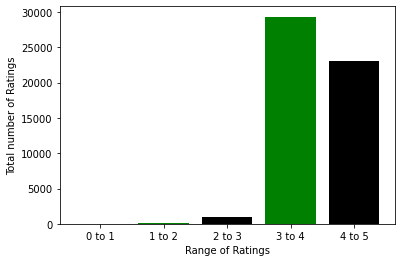

In [ ]:
#what is the average rating given by a person to all kind of book he/she read and in what range does majority of user average rating lies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
rating1=pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/fdb21c94e9e6e3340966a231c5bda91466e61ed6/ratings.csv")

l=rating1.pivot_table(index="user_id",aggfunc="mean")

l["rating4"]=np.where(l["rating"]>=4,1,0)
l["rating3"]=np.where(((l["rating"]>=3) & (l["rating"]<4)),1,0)

l["rating2"]=np.where(((l["rating"]>=2) & (l["rating"]<3)),1,0)
l["rating1"]=np.where(((l["rating"]>=1) & (l["rating"]<2)),1,0)
l["rating0"]=np.where(((l["rating"]>=0) & (l["rating"]<1)),1,0)

s4=sum(l["rating4"])

s3=sum(l["rating3"])
s2=sum(l["rating2"])
s1=sum(l["rating1"])
s0=sum(l["rating0"])
y=["0 to 1","1 to 2","2 to 3","3 to 4","4 to 5"]
x=[s0,s1,s2,s3,s4]
plt.bar(y,x,color=["black","g","black","g","black"])
plt.xlabel("Range of Ratings")
plt.ylabel("Total number of Ratings")
# conclusion is majority of user give average rating to all book which they have read in between range of 3 to 4
# or avrage rating given by a user to any kind of book is 3 to 4



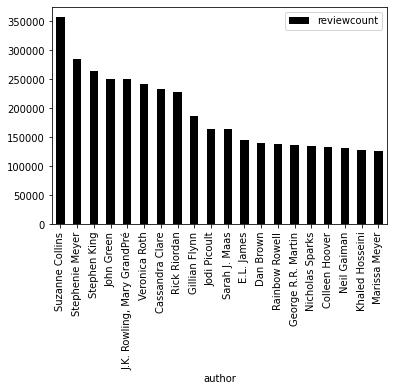

In [ ]:
# top 20 author whose books are reviewed the most
import pandas as pd
books2=pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/fdb21c94e9e6e3340966a231c5bda91466e61ed6/books.csv")
books2
writer=pd.DataFrame()
writer["author"]=books2["authors"]

writer["reviewcount"]=books2["work_text_reviews_count"]
writer=writer.pivot_table(index="author",aggfunc="sum")


m=writer.sort_values("reviewcount",ascending=False)
final=m.head(20)
final

final.plot(kind="bar",color="black")

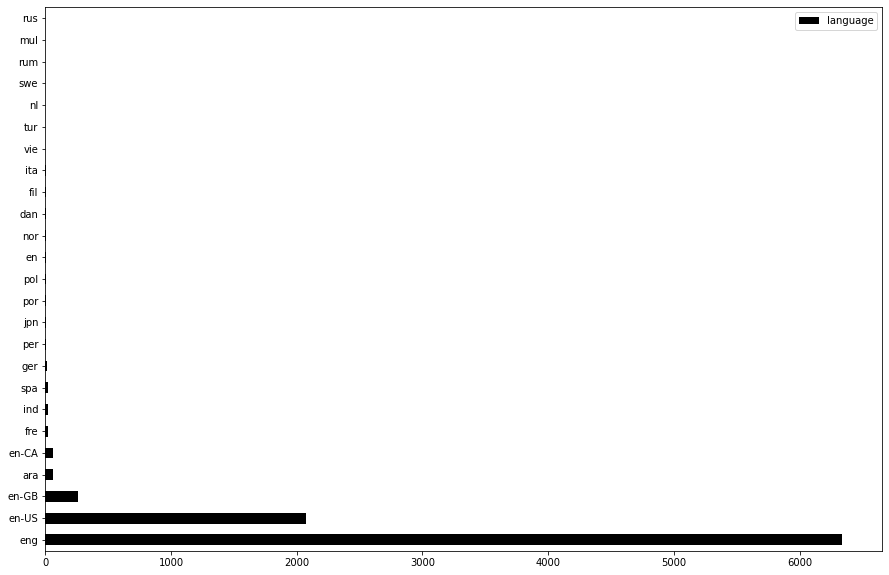

In [ ]:
# most book produce in which language
import pandas as pd
import matplotlib.pyplot as plt
books=pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/fdb21c94e9e6e3340966a231c5bda91466e61ed6/books.csv")
books
lang=pd.DataFrame()
lang["language"]=books["language_code"]

item_count=lang["language"].value_counts()
item_count=pd.DataFrame(item_count)
item_count.index
a=list(item_count.values)

item_count.plot(kind="barh",figsize=(15,10),color="k")


Text(0, 0.5, 'Names of Author')

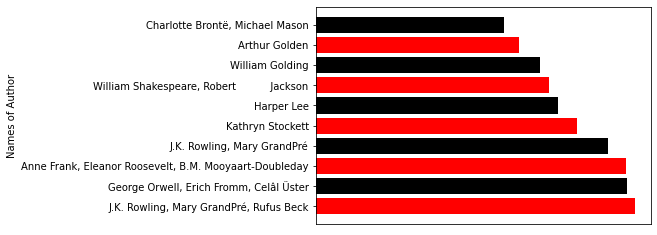

In [ ]:
# top author in term of average rating of their books and the review count on thier books
import pandas as pd
import matplotlib.pyplot as plt
books2=pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/fdb21c94e9e6e3340966a231c5bda91466e61ed6/books.csv")
books2
writer=pd.DataFrame()
writer["author"]=books2["authors"]
writer["rating"]=books2["average_rating"]
writer["ratingcount"]=books2["ratings_count"]
writer=writer.pivot_table(index="author",aggfunc="mean")
writer["overallrating"]=writer["rating"]*writer["ratingcount"]
final=writer.sort_values("overallrating",ascending=False)
final1=final.head(10)
x=list(final1.index)

plt.barh(final1.index,final1["overallrating"],color=["r","k"])
plt.xticks([])
plt.ylabel("Names of Author")